

### 1 "Close" ustuning 2020 yildagi holatini aniqlang.

Google driveni ulash 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2-DATA ni uqish va kerakli kutubxonalarni import qilish

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tesla Stock Data 2016-2021.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [ ]:
df.shape

(1258, 7)

2.1) Ma'lumotlar turlari (Data Types)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


# 3 Masala shartiga ko'ra uni Classification/Regression masalasiga ajratish 

### Har bir ustun uchun statistika

In [ ]:
# bu masala Regression masalasi
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,183.274022,187.265251,178.941224,183.351102,183.351102,4.441050e+07
std,227.979867,232.845126,222.443374,227.987027,227.987027,3.035737e+07
min,36.220001,36.945999,35.397999,35.793999,35.793999,8.297500e+06
25%,54.985001,55.930001,53.929001,54.994501,54.994501,2.478255e+07
50%,66.602002,67.950001,65.445999,66.756000,66.756000,3.498150e+07
75%,165.516998,168.243504,161.504005,163.856503,163.856503,5.211238e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


# 4) Data processing  (ma'lumotlarni qayta ishlash)

---



#### 4.1) Data dagi "Null" qitmatlarni aniqlash

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

###4.2) Data ni analiz qilib oling, original datani yo'qotib quymaslik uchun boshqa df2 ga nusha olvolamiz.

In [ ]:
df2 = df
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


###4.3) Keraksiz ustunni uchirib yuboramiz

*   List item
*   List item



In [ ]:
df2=df2.drop(['Date'],axis=1,inplace=False)
df2

,Open,High,Low,Close,Adj Close,Volume
0,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,44.834000,45.021999,44.535999,44.585999,44.585999,10327500
...,...,...,...,...,...,...
1253,710.169983,719.030029,705.130005,713.760010,713.760010,14715300
1254,713.989990,716.590027,701.880005,709.989990,709.989990,13432300
1255,712.710022,715.179993,704.210022,707.820007,707.820007,9800600
1256,706.340027,722.799988,699.400024,722.250000,722.250000,17459100


###4.4) Bo'sh - yani NaN qilib olingan ustun qiymatlarini analiz qilish

In [ ]:
#Bizda nan qiymatlar yuq
def missing_values_table(mydf):
        
        mis_val = mydf.isnull().sum()

        mis_val_percent = 100 * mydf.isnull().sum() / len(mydf)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        
        columns = {0 : 'Yetishmayotgan qiymatlar', 1 : '% Toliq ustunning necha foizini tashkil qiladi'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% Toliq ustunning necha foizini tashkil qiladi', ascending=False).round(1)
       
        
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df2)

,Yetishmayotgan qiymatlar,% Toliq ustunning necha foizini tashkil qiladi


###4.5.) Data ustunlarining "object" hotidagilarini Integer yani sonli ko'rinishga

> Indented block



In [ ]:
columns  = df2.columns

for c in list(columns):
  df2[c] = df2[c].astype('float64')

###4.6)Ma'lumotlarini tahlil qilish (Exploratory Data Analysis)

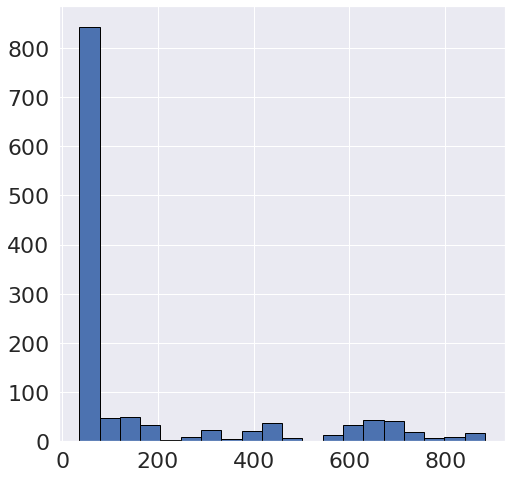

In [ ]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(df['Close'].dropna(), bins = 20, edgecolor = 'black');


Yuqoridagi taqsimot grafigidan bilish mumkinki, ustunlarda g'ayrioddiy qiymatlar bor

In [ ]:
df2['Close'].describe()

count    1258.000000
mean      183.351102
std       227.987027
min        35.793999
25%        54.994501
50%        66.756000
75%       163.856503
max       883.090027
Name: Close, dtype: float64

In [ ]:
df2['Close'].describe().dropna().sort_values().tail(10)

min        35.793999
25%        54.994501
50%        66.756000
75%       163.856503
mean      183.351102
std       227.987027
max       883.090027
count    1258.000000
Name: Close, dtype: float64

In [ ]:
# Birinchi va uchinchi kvartilni hisoblash
first_quartile = df2['Close'].describe()['25%']
third_quartile = df2['Close'].describe()['75%']

# Kvartallar oralig'i
iqr = third_quartile - first_quartile

#  G'ayrioddiy qiymatlarni olib tashlash
df2 = df2[(df2['Close'] > (first_quartile - 3 * iqr)) &
            (df2['Close'] < (third_quartile + 3 * iqr))]

### 4.7)G'ayrioddiy qiymatlarni olib tashlash (Removing Outliers)

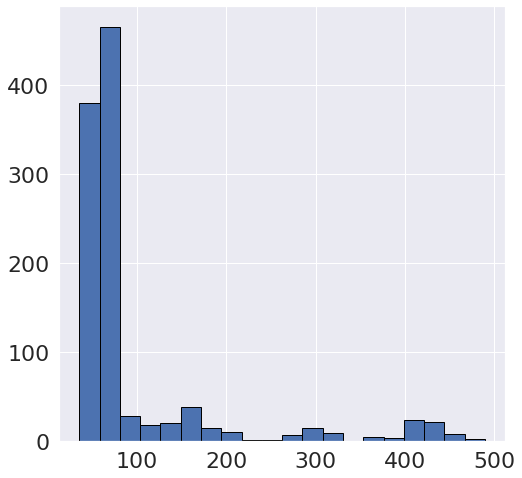

In [ ]:
figsize(8, 8)
plt.hist(df2['Close'].dropna(), bins = 20, edgecolor = 'black');

Korelasiya ko'rinishi

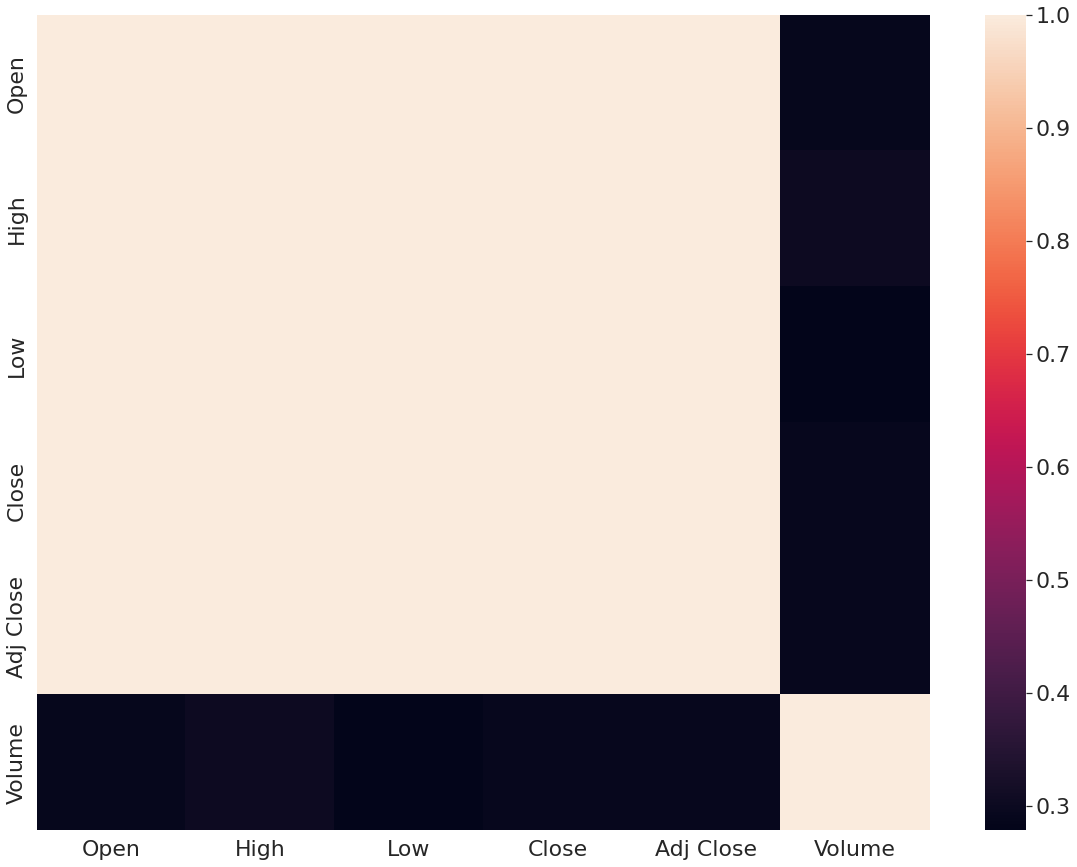

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(df2.corr())

Text(0, 0.5, 'ADJ Close')

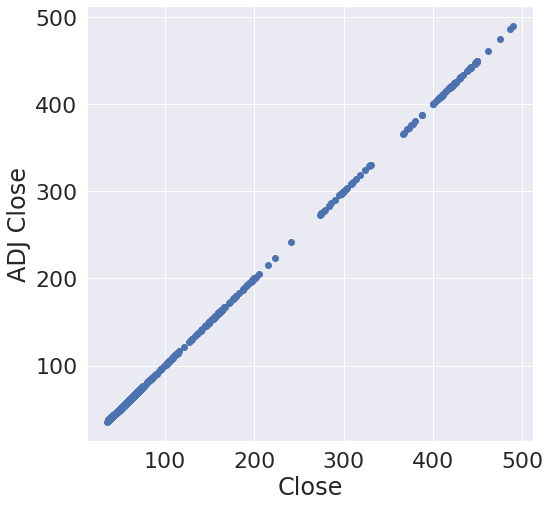

In [ ]:
plot_data = df2[['Close', 'Adj Close']].dropna()

plt.plot(plot_data['Adj Close'], plot_data['Close'], 'bo')
plt.xlabel('Close'); plt.ylabel('ADJ Close')

In [ ]:
def remove_collinear_features(x, threshold):
    
    # "score" ustunini ajratib olish
    y = x['Close']
    x = x.drop(columns = ['Close'])
    
    # Korrelyatsiya matritsasini hisoblash
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Korrelyatsiyani o'zaro har bir ustun bo'yicha hisoblash
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # Agar korrelyatsiya biz qo'ygan chegaradan oshsa ikkita ustundan bittasini ajratib olamiz
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Korrelyatsiya biz qo'ygan chegaradan oshganda tanlangan ustunni o'chirish
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Open', 
                          'High',
                          'Low',
                          'Volume',
                          'Adj Close'
                          ])
    
    
    x['Close'] = y
               
    return x

In [ ]:
# # Funksiyani chaqirib korrelyatsiya  0.6 dan katta bo'lgan ikkita ustundan bittasini o'chirish
# df2 = remove_collinear_features(df2, 0.6);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


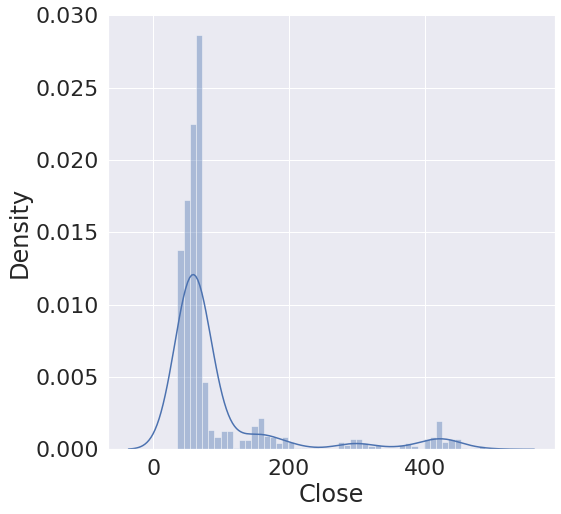

In [ ]:
import seaborn as sns

sns.distplot(df2['Close'])

###5.1. "X" - row data va "y" - Target ni aniqlab olish

In [ ]:
Y = df2['Close']

In [ ]:
Y.head(10)

0    44.722000
1    44.647999
2    44.702000
3    45.000000
4    44.585999
5    44.967999
6    44.523998
7    44.192001
8    43.998001
9    43.040001
Name: Close, dtype: float64

In [ ]:
X = df2.drop(['Close'], axis = 1, inplace=False)

#inplace = False degani, drop bulgan ustun DF3 ni ozida qoladi

###5.2. Data ni TRAIN va TEST qismlarga ajratib olish

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [ ]:
print(X_train.shape, X_test.shape)

(751, 5) (323, 5)


In [ ]:
print(y_train.shape, y_test.shape)

(751,) (323,)



#1.KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mean_absolute_error(y_pred, y_test)

57.10875273188855

#2.RandomForestRegressor


In [ ]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(mean_absolute_error(y_pred, y_test))

print('Variance score: %.2f' % rf.score(X_test, y_test))

0.4128216555727584
Variance score: 1.00


#3 Model ni yaratish (Linear Regression Model)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.intercept_

1.7164239807243575e-08

In [ ]:
y_pred = lm.predict(X_test)
mean_absolute_error(y_pred, y_test)


8.526565690860956e-09

In [ ]:
print('Variance score: %.2f' % lm.score(X_test, y_test))

Variance score: 1.00



#4.DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mean_absolute_error(y_pred, y_test)

0.5881552229102166

In [ ]:
print('Variance score: %.2f' % dt.score(X_test, y_test))

Variance score: 1.00



#5.SVR

In [ ]:

from sklearn.svm import SVR
sv = SVR()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
mean_absolute_error(y_pred, y_test)

43.137699993203825

#6.GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mean_absolute_error(y_pred, y_test)

0.5504181422872014

In [ ]:
print('Variance score: %.2f' % gb.score(X_test, y_test))

Variance score: 1.00



#7.AdaBoostRegressor

In [1]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
mean_absolute_error(y_pred, y_test)

NameError: ignored

In [ ]:
print('Variance score: %.2f' % ab.score(X_test, y_test))

#8.ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(X_train, y_train)
y_pred = ext.predict(X_test)
mean_absolute_error(y_pred, y_test)

0.30416996749226544

In [ ]:
print('Variance score: %.2f' % ext.score(X_test, y_test))

Variance score: 1.00


#Best Model Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.intercept_

1.7164239807243575e-08

In [ ]:
y_pred = lm.predict(X_test)
mean_absolute_error(y_pred, y_test)

8.526565690860956e-09

In [ ]:
print('Variance score: %.2f' % lm.score(X_test, y_test))

Variance score: 1.00


#Model ni test qilish va aniqligini O'lchash

In [ ]:
X_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/teslatest.csv')

In [ ]:
X_new

,Open,High,Low,Close,Adj Close,Volume
0,682.85,692.13,673.7,680.26,680.26,14780000


In [ ]:
Y=X_new['Close']

In [ ]:
X_new=X_new.drop(['Close'], axis = 1, inplace=False)

In [ ]:
X_new

,Open,High,Low,Adj Close,Volume
0,682.85,692.13,673.7,680.26,14780000


In [ ]:
pred_new = lm.predict(X_new)
pred_new

array([680.26000001])

In [ ]:
tsla=pred_new

In [ ]:
tsla

array([680.26000001])

In [ ]:
tsla1=np.array([680.26])

In [ ]:
mean_absolute_error(tsla1, tsla)

1.1710085345839616e-08

# Model ni saqlash

In [ ]:
filename = 'Tesla_model11.sav'
pickle.dump(lm, open(filename, 'wb'))